## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
app_train['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [26]:
print(app_train['HOUSETYPE_MODE'].value_counts(), '\n\n\n')
print(app_train['HOUSETYPE_MODE'].unique())                     # HOUSETYPE_MODE 欄的資料種類

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64 



['block of flats' nan 'terraced house' 'specific housing']


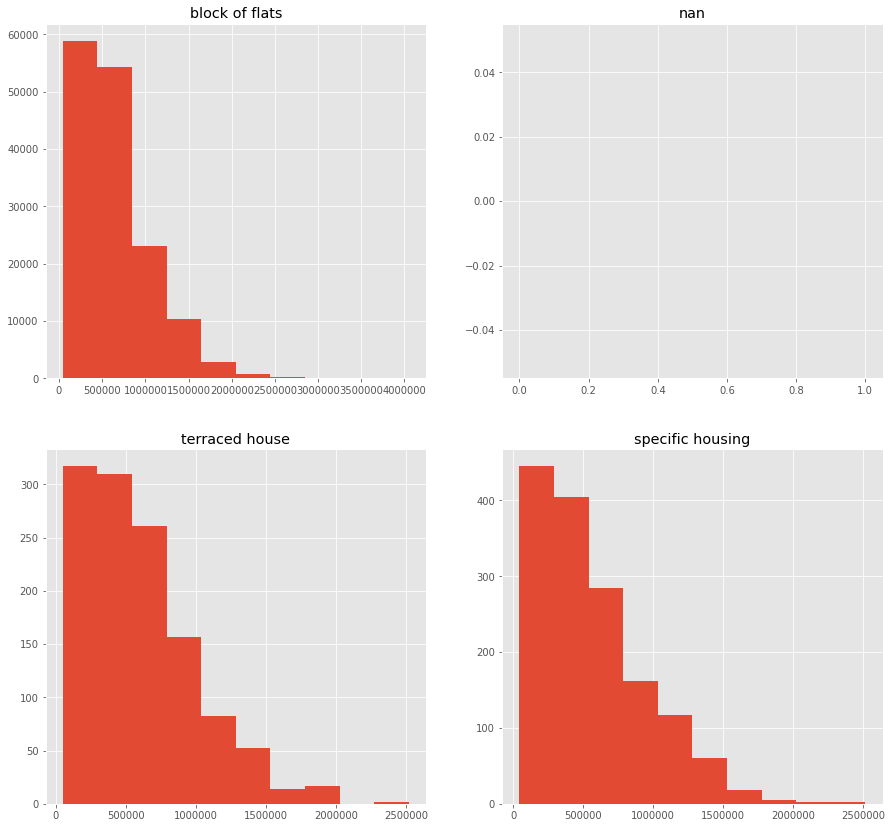

In [32]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

unique_house_type = app_train['HOUSETYPE_MODE'].unique()        # HOUSETYPE_MODE 欄的資料種類

nrows = len(unique_house_type)
ncols = nrows // 2



plt.figure(figsize=(15,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    app_train.loc[ app_train['HOUSETYPE_MODE']==unique_house_type[i] , 'AMT_CREDIT' ].hist()
    # 利用 app_train['HOUSETYPE_MODE'] 的資料分類，印出每個['HOUSETYPE_MODE']資料類別的'AMT_CREDIT'資料關係圖
    # [X軸] : 'AMT_CREDIT' 資料
    # [Y軸] : 每種'AMT_CREDIT'資料的數量

    plt.title(str(unique_house_type[i]))
plt.show()    



## 繪出年齡與'AMT_CREDIT'關係圖

In [38]:
# 把年齡(天)換成正數，並加入(年)欄

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
print( app_train['YEARS_BIRTH'].head() )

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: YEARS_BIRTH, dtype: float64


In [58]:
# 把年齡分類，且把類別放入 unique_age 並按大小排列

app_train['BIRTH_CUTS'] = pd.cut(app_train['YEARS_BIRTH'], bins=np.linspace( 20, 70, num=11) )      # 將年齡分類
# print(app_train['BIRTH_CUTS'].unique())
unique_age = app_train['BIRTH_CUTS'].unique()
unique_age = np.sort(unique_age)    # np.sort 可按大小排列

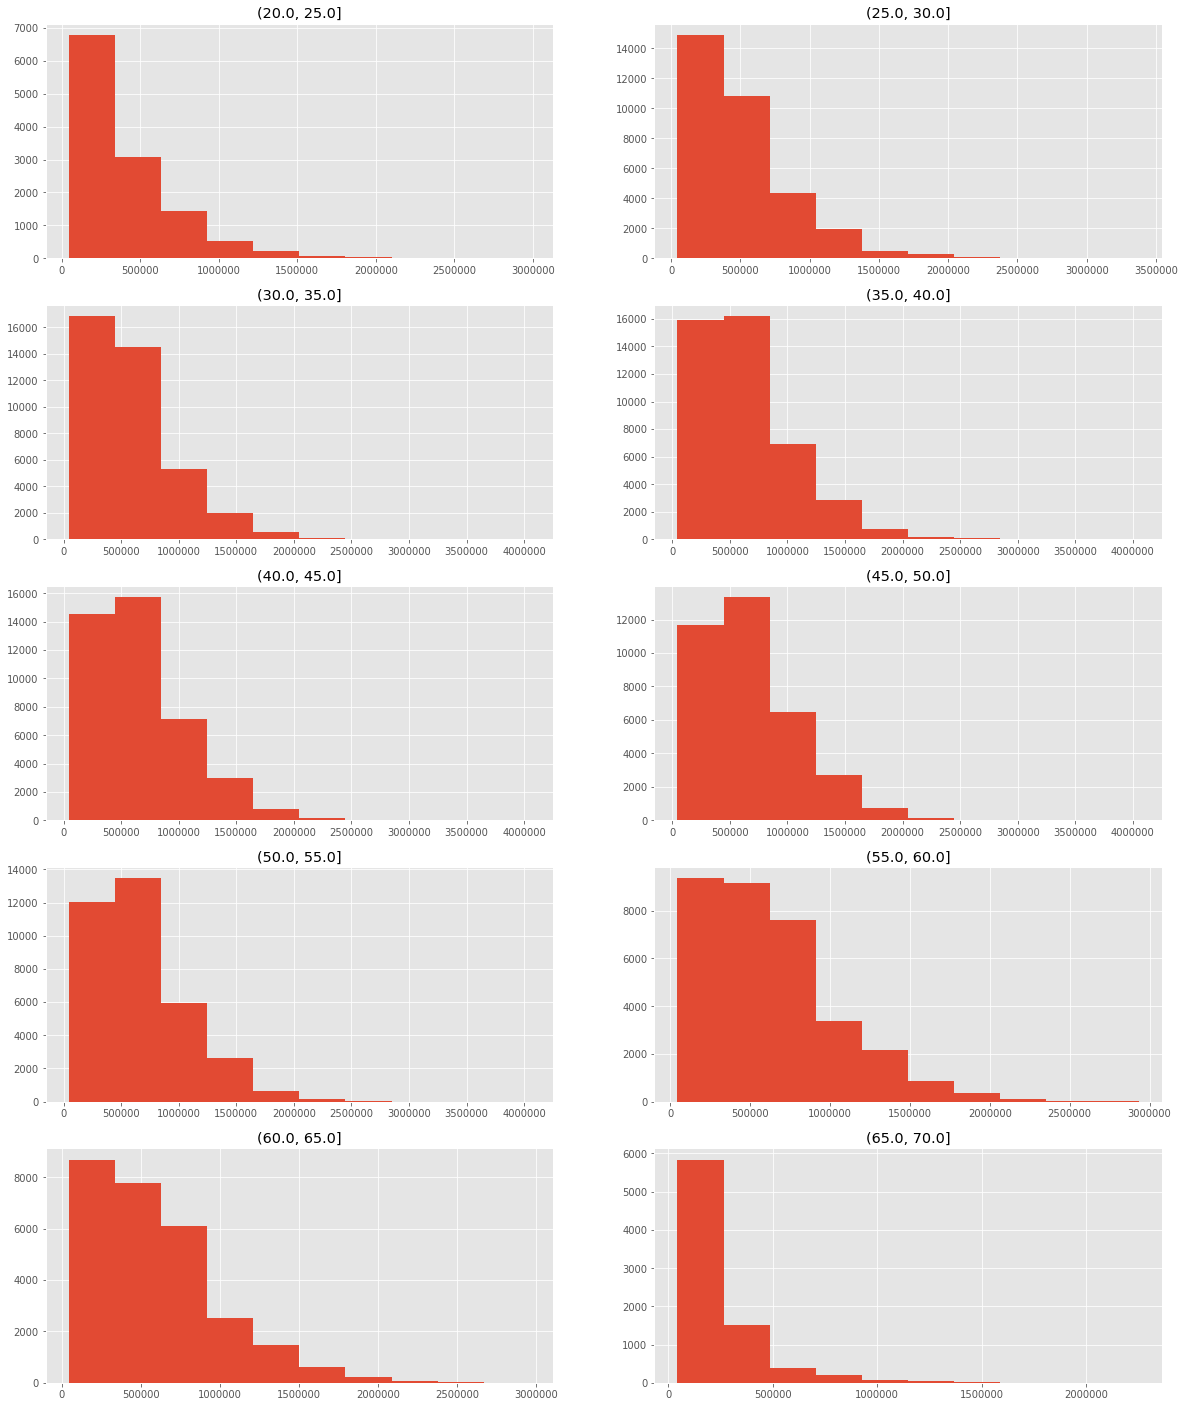

In [59]:
# 繪圖

nrows = 5
ncols = 2

plt.figure( figsize=(20,25) )

for i in range(len(unique_age)):
    plt.subplot(nrows, ncols, i+1)          # (總列數, 總欄數, 第幾項)
    app_train.loc[ app_train['BIRTH_CUTS']==unique_age[i], 'AMT_CREDIT' ].hist()
    plt.title(str(unique_age[i]))

plt.show()
    